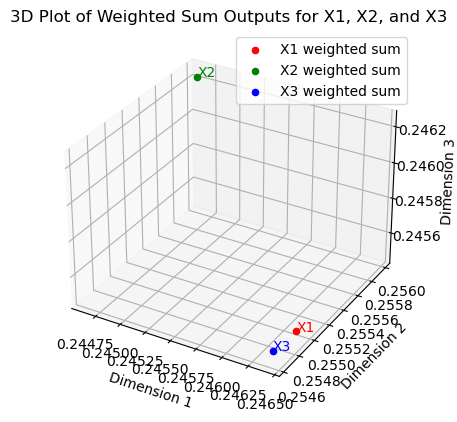

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Scaled dot-product attention
def scaled_dot_product_attention(Q, K, V):
    d_k = K.shape[-1]
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)
    attention_weights = softmax(scores)
    weighted_sum = np.matmul(attention_weights, V)
    return weighted_sum, attention_weights

# Provided Qw, Kw, Vw matrices
Qw = np.array([[0.5, 0.1, 0.3],
               [0.2, 0.3, 0.1],
               [0.1, 0.2, 0.5],
               [0.3, 0.5, 0.2]])

Kw = np.array([[0.4, 0.2, 0.3],
               [0.1, 0.4, 0.2],
               [0.3, 0.1, 0.4],
               [0.2, 0.3, 0.1]])

Vw = np.array([[0.2, 0.4, 0.1],
               [0.3, 0.2, 0.4],
               [0.1, 0.3, 0.2],
               [0.4, 0.1, 0.3]])

# Input vectors X1, X2, X3
X1 = np.array([1, 0, 0, 1])
X2 = np.array([0, 2, 2, 0])
X3 = np.array([1, 1, 0, 0])

# Create query matrices for each input by multiplying the input vectors with Qw
Q_X1 = np.matmul(X1, Qw)
Q_X2 = np.matmul(X2, Qw)
Q_X3 = np.matmul(X3, Qw)

# Compute the weighted sums for each input
weighted_sum_X1, attention_X1 = scaled_dot_product_attention(Q_X1, Kw, Vw)
weighted_sum_X2, attention_X2 = scaled_dot_product_attention(Q_X2, Kw, Vw)
weighted_sum_X3, attention_X3 = scaled_dot_product_attention(Q_X3, Kw, Vw)

# Extract the first 3 dimensions from the weighted sums for plotting in 3D
X1_point = weighted_sum_X1[:3]
X2_point = weighted_sum_X2[:3]
X3_point = weighted_sum_X3[:3]

# Set up 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the weighted sum points for X1, X2, X3
ax.scatter(X1_point[0], X1_point[1], X1_point[2], color='r', label='X1 weighted sum')
ax.scatter(X2_point[0], X2_point[1], X2_point[2], color='g', label='X2 weighted sum')
ax.scatter(X3_point[0], X3_point[1], X3_point[2], color='b', label='X3 weighted sum')

# Add labels to the points
ax.text(X1_point[0], X1_point[1], X1_point[2], 'X1', color='red')
ax.text(X2_point[0], X2_point[1], X2_point[2], 'X2', color='green')
ax.text(X3_point[0], X3_point[1], X3_point[2], 'X3', color='blue')

# Set plot labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Plot of Weighted Sum Outputs for X1, X2, and X3')

# Show legend and plot
ax.legend()
plt.show()
